In [1]:
# https://www.kaggle.com/shayanfazeli/heartbeat   # data set 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # plotting
import os
import sklearn
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate

Using TensorFlow backend.


In [2]:
normal=pd.read_csv("ptbdb_normal.csv",header=None) 
#normal.head(2) #for 2 rows
#normal.head() #for some top rows
#normal

abnormal=pd.read_csv("ptbdb_abnormal.csv",header=None) 
#abnormal

test=pd.read_csv("mitbih_test.csv",header=None) 
#test.head(2)
#test

train=pd.read_csv("mitbih_train.csv",header=None) 
#train

In [3]:
print("Type\tCount")
print((train[187]).value_counts())
#Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
# N- normal, S-supraventricular, V-ventricular, F-fusion, Q- unknown

x1_train=train.iloc[:,0:187] 
print("x_train shape : ",x1_train.shape)

y1_train=train.iloc[:,187] 
print("y_train shape : ",y1_train.shape)


x1_test=test.iloc[:,0:187] 
print("x_test shape : ",x1_test.shape)

y1_test=test.iloc[:,187] 
print("y_test shape : ",y1_test.shape)

Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
x_train shape :  (87554, 187)
y_train shape :  (87554,)
x_test shape :  (21892, 187)
y_test shape :  (21892,)


In [4]:
y_train=[]                              # making multiclass to binary class now y_train containing either 0 or 1 
for i in y1_train:
  if i not in  [0.0]:
    y_train.append(1)
    #print("value is",i)
  else:
    y_train.append(0)
    #print("value",i)
    
#print(type(y1))    
#print(y_train.shape)

In [5]:
y_test=[]                              # making multiclass to binary class.now y_test containing either 0 or 1 
for i in y1_test:
  if i not in  [0.0]:
    y_test.append(1)
    #print("value is",i)
  else:
    y_test.append(0)
    #print("value",i)
#print(y_test)

In [6]:
#create new df 
y_train = pd.DataFrame({'col':y_train})
#print (y_train)

y_test = pd.DataFrame({'col':y_test})
#print (y_test)

print("x_train shape : ",x1_train.shape)
print("y_train shape : ",y_train.shape)
print("x_test shape : ",x1_test.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (87554, 187)
y_train shape :  (87554, 1)
x_test shape :  (21892, 187)
y_test shape :  (21892, 1)


In [7]:
x1_train[187] = y_train
x1_test[187] =  y_test

train=x1_train
test=x1_test

#print("Type\tCount")
a=(train[187]).value_counts()
#print(a)
print('train dataset Class 0 :', a[0])
print('train dataset Class 1 :', a[1])

#a.plot(kind='bar', title='Count of train classes');

print("****************************")

#print("Type\tCount")
b=(test[187]).value_counts()
#print(b)
print('test dataset Class 0 :', b[0])
print('test dataset Class 1 :', b[1])
#b.plot(kind='bar', title='Count of test classes');

# Class count
tr_count_class_0, tr_count_class_1=train[187].value_counts()
ts_count_class_0, ts_count_class_1=test[187].value_counts()


train dataset Class 0 : 72471
train dataset Class 1 : 15083
****************************
test dataset Class 0 : 18118
test dataset Class 1 : 3774


Random over-sampling of train data:
1    72471
0    72471
Name: 187, dtype: int64


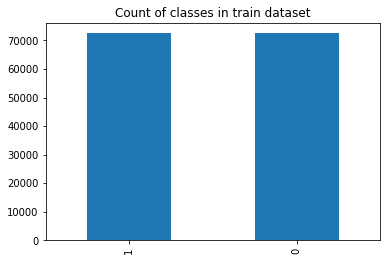

In [8]:
# Divide by class
tr_class_0 = train[train[187] == 0]
tr_class_1 = train[train[187] == 1]

ts_class_0 = test[test[187] == 0]
ts_class_1 = test[test[187] == 1]

tr_class1_over = tr_class_1.sample(tr_count_class_0, replace=True)
train_over = pd.concat([tr_class_0, tr_class1_over], axis=0)

print('Random over-sampling of train data:')

print(train_over[187].value_counts())

train_over[187].value_counts().plot(kind='bar', title='Count of classes in train dataset');



Random over-sampling of test data:
1    18118
0    18118
Name: 187, dtype: int64


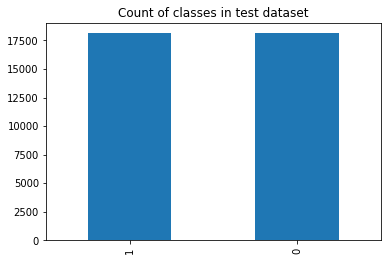

In [9]:
ts_class1_over = ts_class_1.sample(ts_count_class_0, replace=True)
test_over = pd.concat([ts_class_0, ts_class1_over], axis=0)

print('Random over-sampling of test data:')
print(test_over[187].value_counts())

test_over[187].value_counts().plot(kind='bar', title='Count of classes in test dataset');




In [10]:
train=train_over
test=test_over


In [11]:
print("Type\tCount")
print((train[187]).value_counts())


print("***************************")

print("Type\tCount")
print((test[187]).value_counts())

x1_train=train.iloc[:,0:187] 
print("x_train shape : ",x1_train.shape)

y1_train=train.iloc[:,187] 
print("y_train shape : ",y1_train.shape)


x1_test=test.iloc[:,0:187] 
print("x_test shape : ",x1_test.shape)

y1_test=test.iloc[:,187] 
print("y_test shape : ",y1_test.shape)


Type	Count
1    72471
0    72471
Name: 187, dtype: int64
***************************
Type	Count
1    18118
0    18118
Name: 187, dtype: int64
x_train shape :  (144942, 187)
y_train shape :  (144942,)
x_test shape :  (36236, 187)
y_test shape :  (36236,)


In [12]:
from sklearn.preprocessing import StandardScaler
standardized_tr_data=StandardScaler().fit_transform(x1_train)
print(standardized_tr_data.shape)

standardized_ts_data=StandardScaler().fit_transform(x1_test)
print(standardized_ts_data.shape)

sample_tr_data=standardized_tr_data
labels_tr=y1_train
print("shape of train sample {0} and labels {1}".format(sample_tr_data.shape,y1_train.shape))

sample_ts_data=standardized_ts_data
labels_ts=y1_test
print("shape of test sample {0} and labels {1}".format(sample_ts_data.shape,y1_test.shape))



(144942, 187)
(36236, 187)
shape of train sample (144942, 187) and labels (144942,)
shape of test sample (36236, 187) and labels (36236,)


In [13]:
#for train data

from sklearn import decomposition
pca=decomposition.PCA()

pca.n_components = 80
tr_pca_data = pca.fit_transform(sample_tr_data)


percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_ )

cummulative_var_exp = np.cumsum(percentage_var_explained)


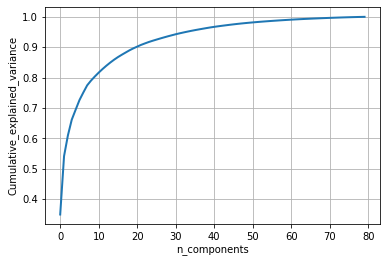

In [14]:
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cummulative_var_exp, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [15]:
#for test data

from sklearn import decomposition
pca=decomposition.PCA()

pca.n_components = 80
ts_pca_data = pca.fit_transform(sample_ts_data)


percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_ )

cummulative_var_exp = np.cumsum(percentage_var_explained)


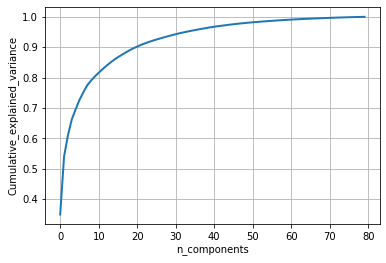

In [16]:

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cummulative_var_exp, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [17]:
print(tr_pca_data.shape)
print(y1_train.shape)

print(ts_pca_data.shape)
print(y1_test.shape)

x_train1=tr_pca_data
y_train1=y1_train
x_test1=ts_pca_data
y_test1=y1_test

print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)
print(y_test1.shape)

(144942, 80)
(144942,)
(36236, 80)
(36236,)
(144942, 80)
(144942,)
(36236, 80)
(36236,)


In [18]:
#Naive Bayes
a_nb=GaussianNB()
a_nb.fit(x_train1,y_train1)
y_pred_nb=a_nb.predict(x_test1)

cm_nb=confusion_matrix(y_test1,y_pred_nb)
print(cm_nb)
print("********************************")

report_nb=classification_report(y_test1,y_pred_nb)
print(report_nb)

print("********************************")

Precision_nb= precision_score(y_test1, y_pred_nb,average='weighted')      
print('Precision of nb is : {0}'.format(Precision_nb))

Recall_nb= recall_score(y_test1, y_pred_nb,average='weighted')
print('Recall of nb is : {0}'.format(Recall_nb))

F1_score_nb= f1_score(y_test1, y_pred_nb,average='weighted')
print('F1_score of nb is : {0}'.format(F1_score_nb))

Accuracy_nb=accuracy_score(y_test1, y_pred_nb)
print("Accuracy of nb is : {0}".format(Accuracy_nb))

#Precision of nb is : 0.7387312150611883
#Recall of nb is : 0.7290263826029363
#F1_score of nb is : 0.7262442223861206
#Accuracy of nb is : 0.7290263826029363





[[11598  6520]
 [ 3157 14961]]
********************************
              precision    recall  f1-score   support

           0       0.79      0.64      0.71     18118
           1       0.70      0.83      0.76     18118

    accuracy                           0.73     36236
   macro avg       0.74      0.73      0.73     36236
weighted avg       0.74      0.73      0.73     36236

********************************
Precision of nb is : 0.7412572932340529
Recall of nb is : 0.7329451374323877
F1_score of nb is : 0.7306249094177311
Accuracy of nb is : 0.7329451374323877
